In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv("C:/Users/xy200/OneDrive/Desktop/24sping/ds bootcamp/AB_NYC_2019.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [39]:
# Add last review到2019年最后一天天数
data['days_to_last_review'] = pd.to_datetime('2019-12-31') - pd.to_datetime(data['last_review'])
data['days_to_last_review'] = data['days_to_last_review'].dt.days
data['days_to_last_review'][np.isnan(data['days_to_last_review'])] = data['days_to_last_review'].max() + 10000

C:\Users\xy200\AppData\Local\Temp\ipykernel_136220\4167932887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['days_to_last_review'][np.isnan(data['days_to_last_review'])] = data['days_to_last_review'].max() + 10000


In [40]:
# Add popularity: neighborhood with counts > 1000
neighborhood_counts = data['neighbourhood'].value_counts()
popular_neighbors = neighborhood_counts[neighborhood_counts > 1000].index
data['popularity'] = data['neighbourhood'].apply(lambda x: int(x in popular_neighbors))
data['popularity']

0        0
1        1
2        1
3        0
4        1
        ..
48890    1
48891    1
48892    1
48893    1
48894    1
Name: popularity, Length: 48895, dtype: int64

In [41]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'days_to_last_review', 'popularity'],
      dtype='object')

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import mstats

In [43]:
# Assuming 'last_review' is a date column and needs to be excluded
data.drop(['id', 'host_id', 'name', 'host_name', 'neighbourhood', 'last_review'], axis=1, inplace=True)

# Continue with other preprocessing steps
data.fillna(0, inplace=True)
categorical_cols = ['neighbourhood_group', 'room_type']
data = pd.get_dummies(data, columns=categorical_cols)

# Winsorize the 'price' variable
data['price'] = mstats.winsorize(data['price'], limits=[0.1, 0.1])

# Define features and target variable
X = data.drop('price', axis=1)
y = data['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=999)

In [34]:
# Linear Regression with Lasso regularization
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

# Extra Trees Regressor
extra_trees = ExtraTreesRegressor(n_estimators=100, random_state=999)
extra_trees.fit(X_train, y_train)

ExtraTreesRegressor(random_state=999)

In [35]:
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, predictions)
    return mae, mse, rmse, r2

# Evaluate Lasso Regression
lasso_mae, lasso_mse, lasso_rmse, lasso_r2 = evaluate_model(lasso_reg, X_test, y_test)

# Evaluate Extra Trees Regressor
extra_trees_mae, extra_trees_mse, extra_trees_rmse, extra_trees_r2 = evaluate_model(extra_trees, X_test, y_test)

print("Lasso Regression Metrics:")
print(f"MAE: {lasso_mae}, MSE: {lasso_mse}, RMSE: {lasso_rmse}, R²: {lasso_r2}")

print("Extra Trees Regressor Metrics:")
print(f"MAE: {extra_trees_mae}, MSE: {extra_trees_mse}, RMSE: {extra_trees_rmse}, R²: {extra_trees_r2}")

Lasso Regression Metrics:
MAE: 38.59189244095283, MSE: 2548.6516316191705, RMSE: 50.48417209006374, R²: 0.4987382523865933
Extra Trees Regressor Metrics:
MAE: 32.833714762927364, MSE: 2047.0382500017042, RMSE: 45.24420681149913, R²: 0.5973941836941221


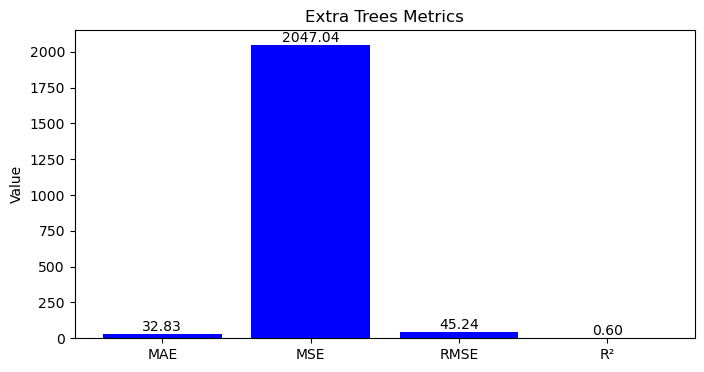

In [36]:
import matplotlib.pyplot as plt

metrics = ['MAE', 'MSE', 'RMSE', 'R²']
values = [extra_trees_mae, extra_trees_mse, extra_trees_rmse, extra_trees_r2]

plt.figure(figsize=(8, 4))
plt.bar(metrics, values, color='blue')
plt.title('Extra Trees Metrics')
plt.ylabel('Value')
for i, v in enumerate(values):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center', va='bottom')
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [24]:
# Evaluate Linear Regression
linear_mae, linear_mse, linear_rmse, linear_r2 = evaluate_model(linear_reg, X_test, y_test)

print("Linear Regression Metrics:")
print(f"MAE: {linear_mae}, MSE: {linear_mse}, RMSE: {linear_rmse}, R²: {linear_r2}")

Linear Regression Metrics:
MAE: 46.37163079546549, MSE: 4120.8748696709445, RMSE: 64.19404076447395, R²: 0.44432848298334027


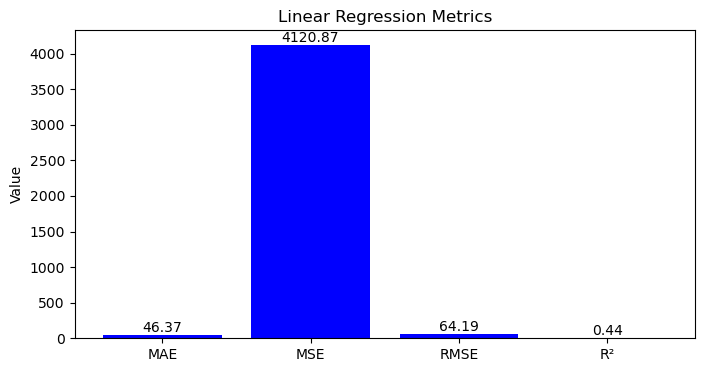

In [25]:
# Visualization code using Matplotlib
import matplotlib.pyplot as plt

metrics = ['MAE', 'MSE', 'RMSE', 'R²']
values = [linear_mae, linear_mse, linear_rmse, linear_r2]

plt.figure(figsize=(8, 4))
plt.bar(metrics, values, color='blue')
plt.title('Linear Regression Metrics')
plt.ylabel('Value')
for i, v in enumerate(values):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center', va='bottom')
plt.show()

In [30]:
import pandas as pd
from scipy.stats import mstats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Winsorize the 'price' variable
data['price'] = mstats.winsorize(data['price'], limits=[0.1, 0.1])  # Adjust limits as necessary

# Prepare features and target variable
X = data.drop('price', axis=1)
y = data['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=999)

# Create and fit the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Prediction and evaluation
predictions = linear_reg.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5
r2 = r2_score(y_test, predictions)

# Print the metrics
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}")

MAE: 38.43823115510292, MSE: 2524.1840899583676, RMSE: 50.24125884129863, R²: 0.5035504607482776


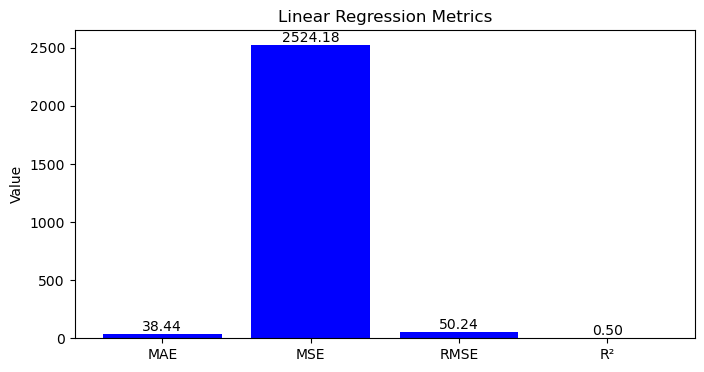

In [32]:
# Visualization code using Matplotlib
import matplotlib.pyplot as plt

metrics = ['MAE', 'MSE', 'RMSE', 'R²']
values = [mae, mse, rmse, r2]

plt.figure(figsize=(8, 4))
plt.bar(metrics, values, color='blue')
plt.title('Linear Regression Metrics')
plt.ylabel('Value')
for i, v in enumerate(values):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center', va='bottom')
plt.show()